
# Step-by-Step Guide to Install Docker Desktop on Your System


## 1. Download Docker Desktop
#### Step 1: Visit the Official Website
Navigate to the Docker Desktop page at: [https://www.docker.com/products/docker-desktop/](https://www.docker.com/products/docker-desktop/).

#### Step 2: Choose Your Platform
On the webpage:

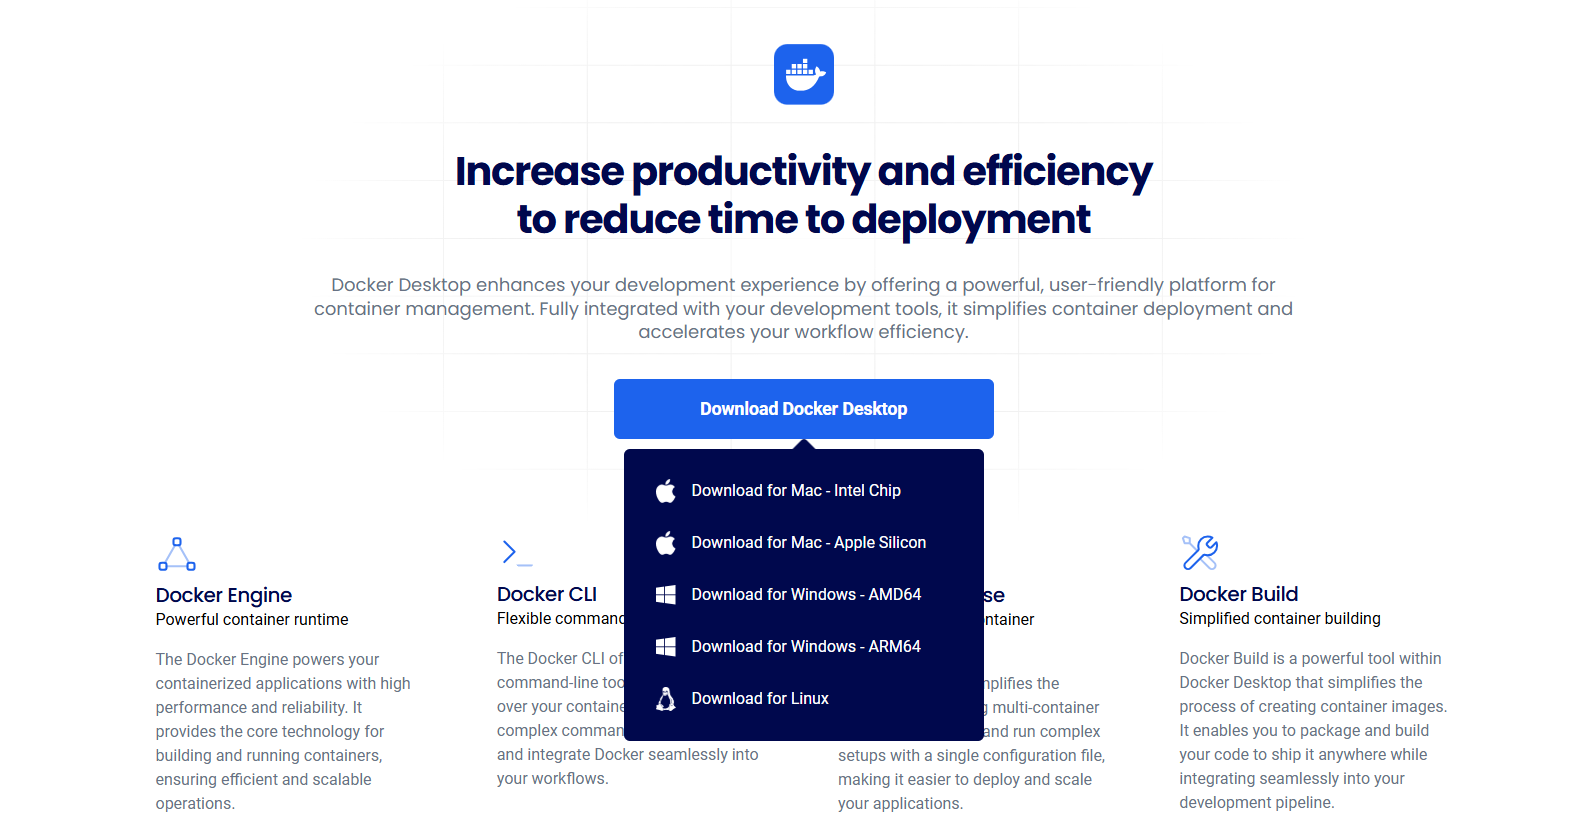

1. Click the **Download Docker Desktop** button.
2. A dropdown menu will appear (as seen in the screenshot).
3. Select the appropriate version based on your system:
   - **Windows**: 
     - If you have a 64-bit processor, choose `Download for Windows - AMD64`.
     - For ARM-based processors, choose `Download for Windows - ARM64`.
   - **Mac**: Choose the version matching your chip type (`Intel Chip` or `Apple Silicon`).
   - **Linux**: Click `Download for Linux`.
4. The download will start, and you’ll receive a `.exe` file for Windows.


## 2. Install Docker Desktop

#### Step 1: Run the Installer
1. Locate the downloaded `.exe` file (e.g., `Docker Desktop Installer.exe`) in your **Downloads** folder.
2. Double-click the installer to run it.

#### Step 2: Follow the Setup Wizard
1. **Welcome Screen**: A setup wizard will open. Click **Next** to proceed.
2. **Configuration Options**:
   - Ensure that **Enable WSL 2 Features** is checked (recommended for better performance).
   - If you don't have WSL 2 installed, the installer will prompt you to install it.
3. Click **Install** to begin the installation process.
4. Wait for the installation to complete. Once done, click **Finish**.

#### Step 3: Start Docker Desktop
1. After installation, Docker Desktop should open automatically. If not, search for "Docker Desktop" in the Windows **Start Menu** and open it.
2. Log in or create a Docker account (if required).


## 3. Verify Docker Installation
After installation, it’s crucial to verify that Docker Desktop is installed and running correctly.

1. Open a **Command Prompt** or **PowerShell** window.
2. Type the following command and press Enter:

   ```bash
   docker --version
   ```
4. You should see the installed Docker version (e.g., `Docker version 27.4.0, build bde2b89`).

---

# Docker Workflow: Understanding Images, Containers, and Docker Hub

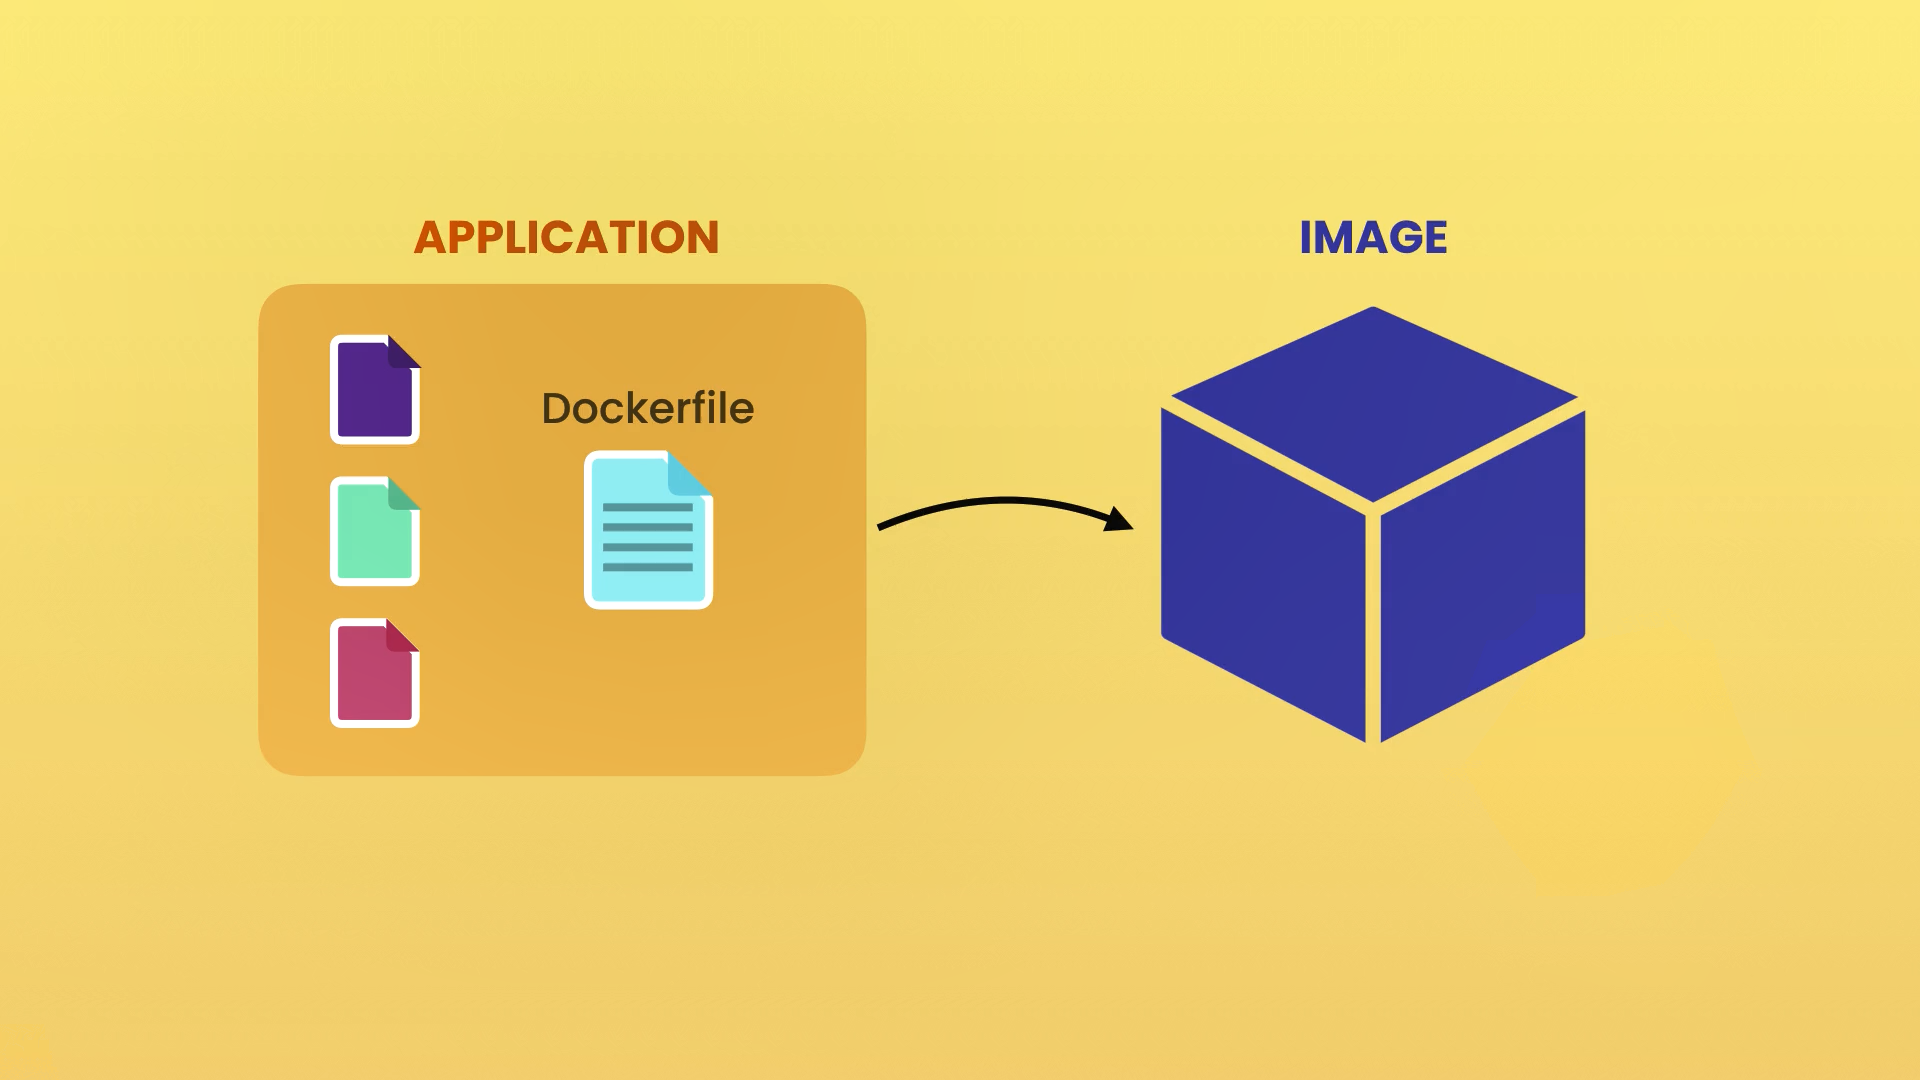

## Dockerfile

**Definition**: A Dockerfile is a plain-text file containing instructions for building a Docker image. It defines the steps required to assemble an image, including the operating system, application code, dependencies, environment variables, and configuration.

**Key Features**:

- **Layered Builds**: Each instruction in a Dockerfile creates a new image layer, enabling efficient reuse and storage of common layers.
- **Customizability**: Developers can tailor images to specific application requirements using a Dockerfile.

**Basic Structure**:
Here’s an example Dockerfile for a Node.js application:

```dockerfile
# Use a base image
FROM node:16

# Set the working directory
WORKDIR /app

# Copy application files
COPY package*.json ./
COPY . .

# Install dependencies
RUN npm install

# Expose the application port
EXPOSE 3000

# Define the command to run the application
CMD ["npm", "start"]

```

### Workflow:

Write a Dockerfile: Developers define the application's environment and dependencies in the Dockerfile.

Build the Image: Run the docker build command to create an image from the Dockerfile.

```
docker build -t my-app .
```
Run a Container: Use the built image to create and start a container.

```
docker run -d -p 3000:3000 my-app
```

### Relationship to Image:

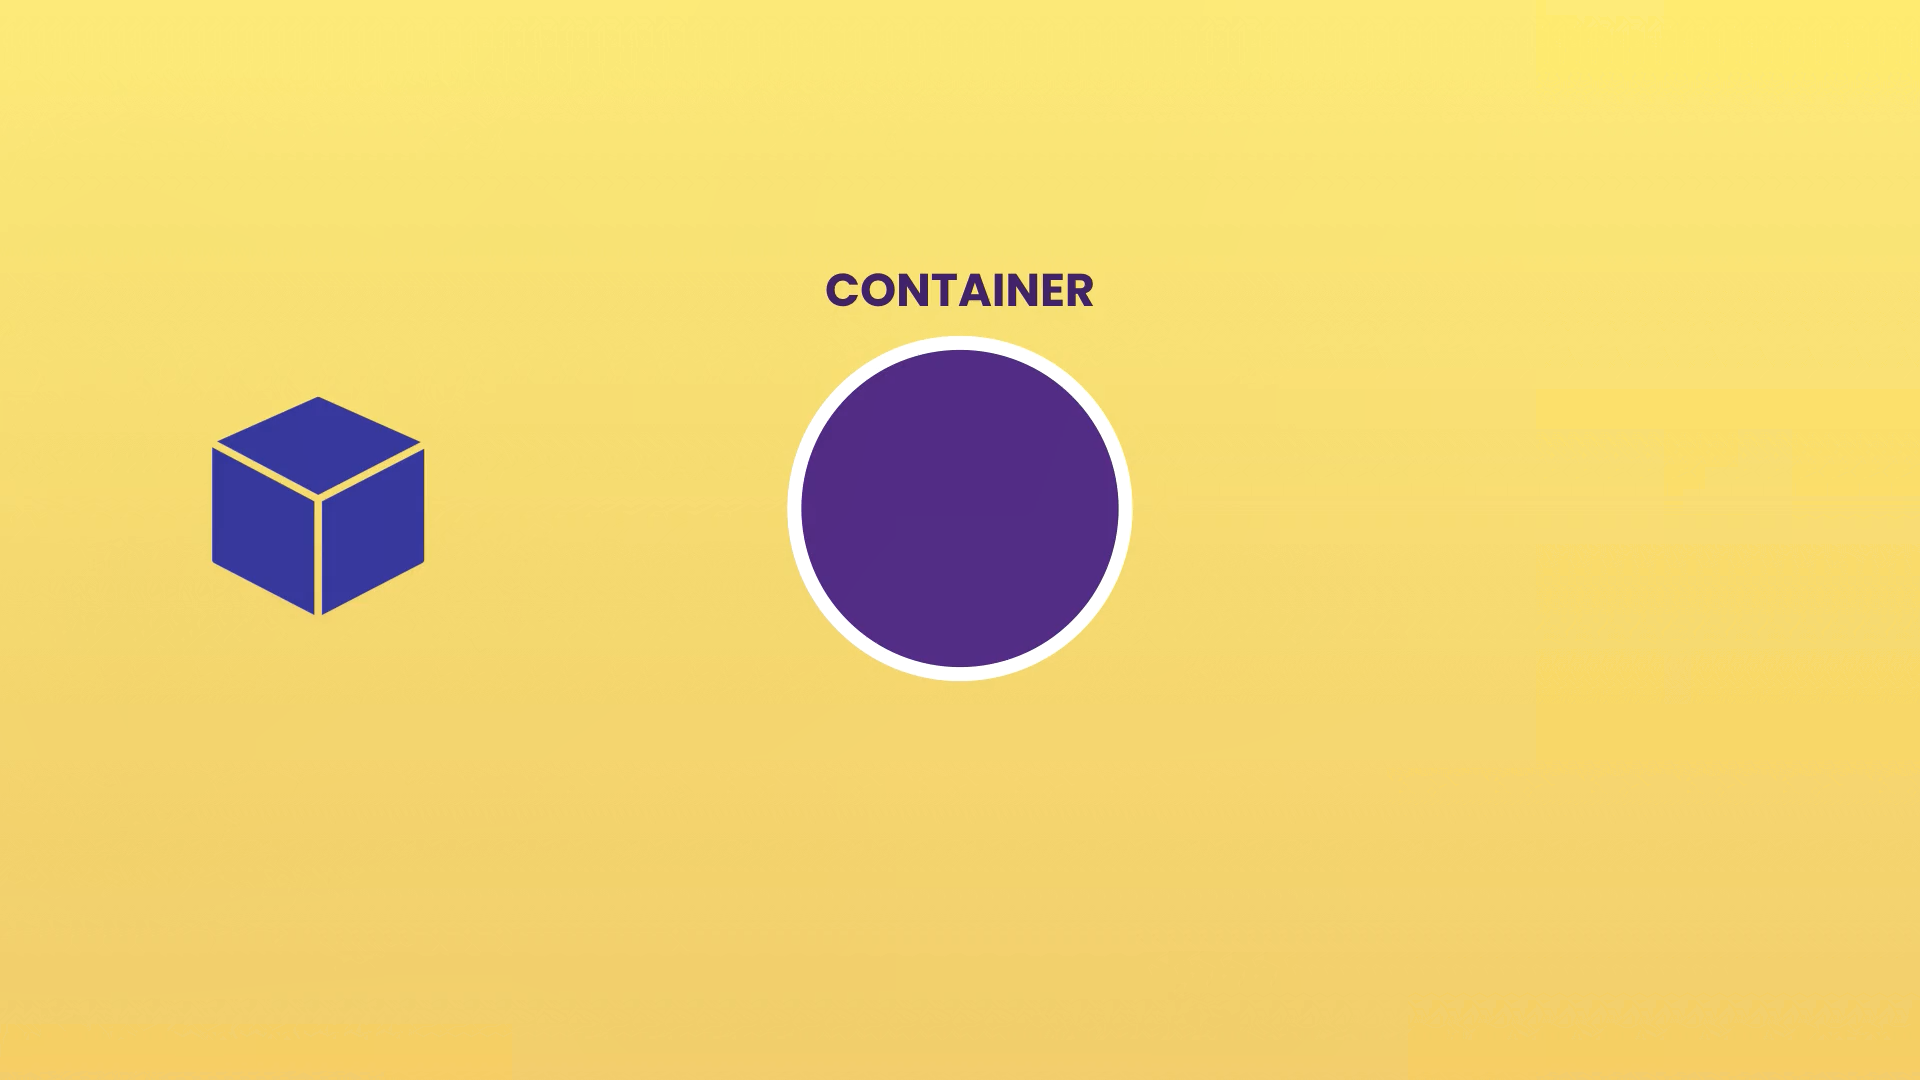

A Dockerfile is the blueprint for creating a Docker image.
The docker build command processes the Dockerfile to generate a reusable and portable image.

## Docker Images

**Definition**: A Docker image is a read-only template that contains instructions for creating a Docker container. It includes the application code, libraries, dependencies, and the necessary configuration to run the application.

**Key Characteristics**:

- **Layered Structure**: Images are built in layers, with each layer representing a set of file changes or instructions. This layering allows for efficient storage and reuse of common layers across multiple images.

- **Immutability**: Once created, images do not change. Any modifications result in the creation of a new image layer, ensuring consistency and reliability.
- 
It includes everything required to run an application, such as:

- **A stripped-down operating system** (e.g., Linux-based OS).
- **Runtime environment** (e.g., Node.js for JavaScript applications).
- **Application files**.
- **Third-party libraries** and dependencies.
- **Environment variables**.


## Docker Containers

**Definition**: A Docker container is a runtime instance of a Docker image. It encapsulates the application and its environment, running in an isolated process on the host system.

**Key Characteristics**:

- **Isolation**: Containers run in isolated environments, ensuring that applications do not interfere with each other or the host system.

- **Ephemeral Nature**: Containers can be started, stopped, and deleted without affecting the underlying image. Any changes made to a running container can be committed to create a new image layer.

**Analogy**: Think of a Docker image as a blueprint (class) and a container as a building (object) constructed from that blueprint. Multiple buildings can be constructed from the same blueprint, just as multiple containers can be instantiated from the same image.



## Relationship Between Images and Containers

- **Creation**: Containers are created from images. When you run an image, Docker creates a container based on that image.

- **Independence**: An image can exist without any containers, but a container cannot exist without an image. Containers depend on images as their source.

- **Lifecycle**: While images are static and immutable, containers are dynamic and can be modified during their lifecycle. Changes made to a container can be saved by committing those changes to a new image.



## Docker Hub

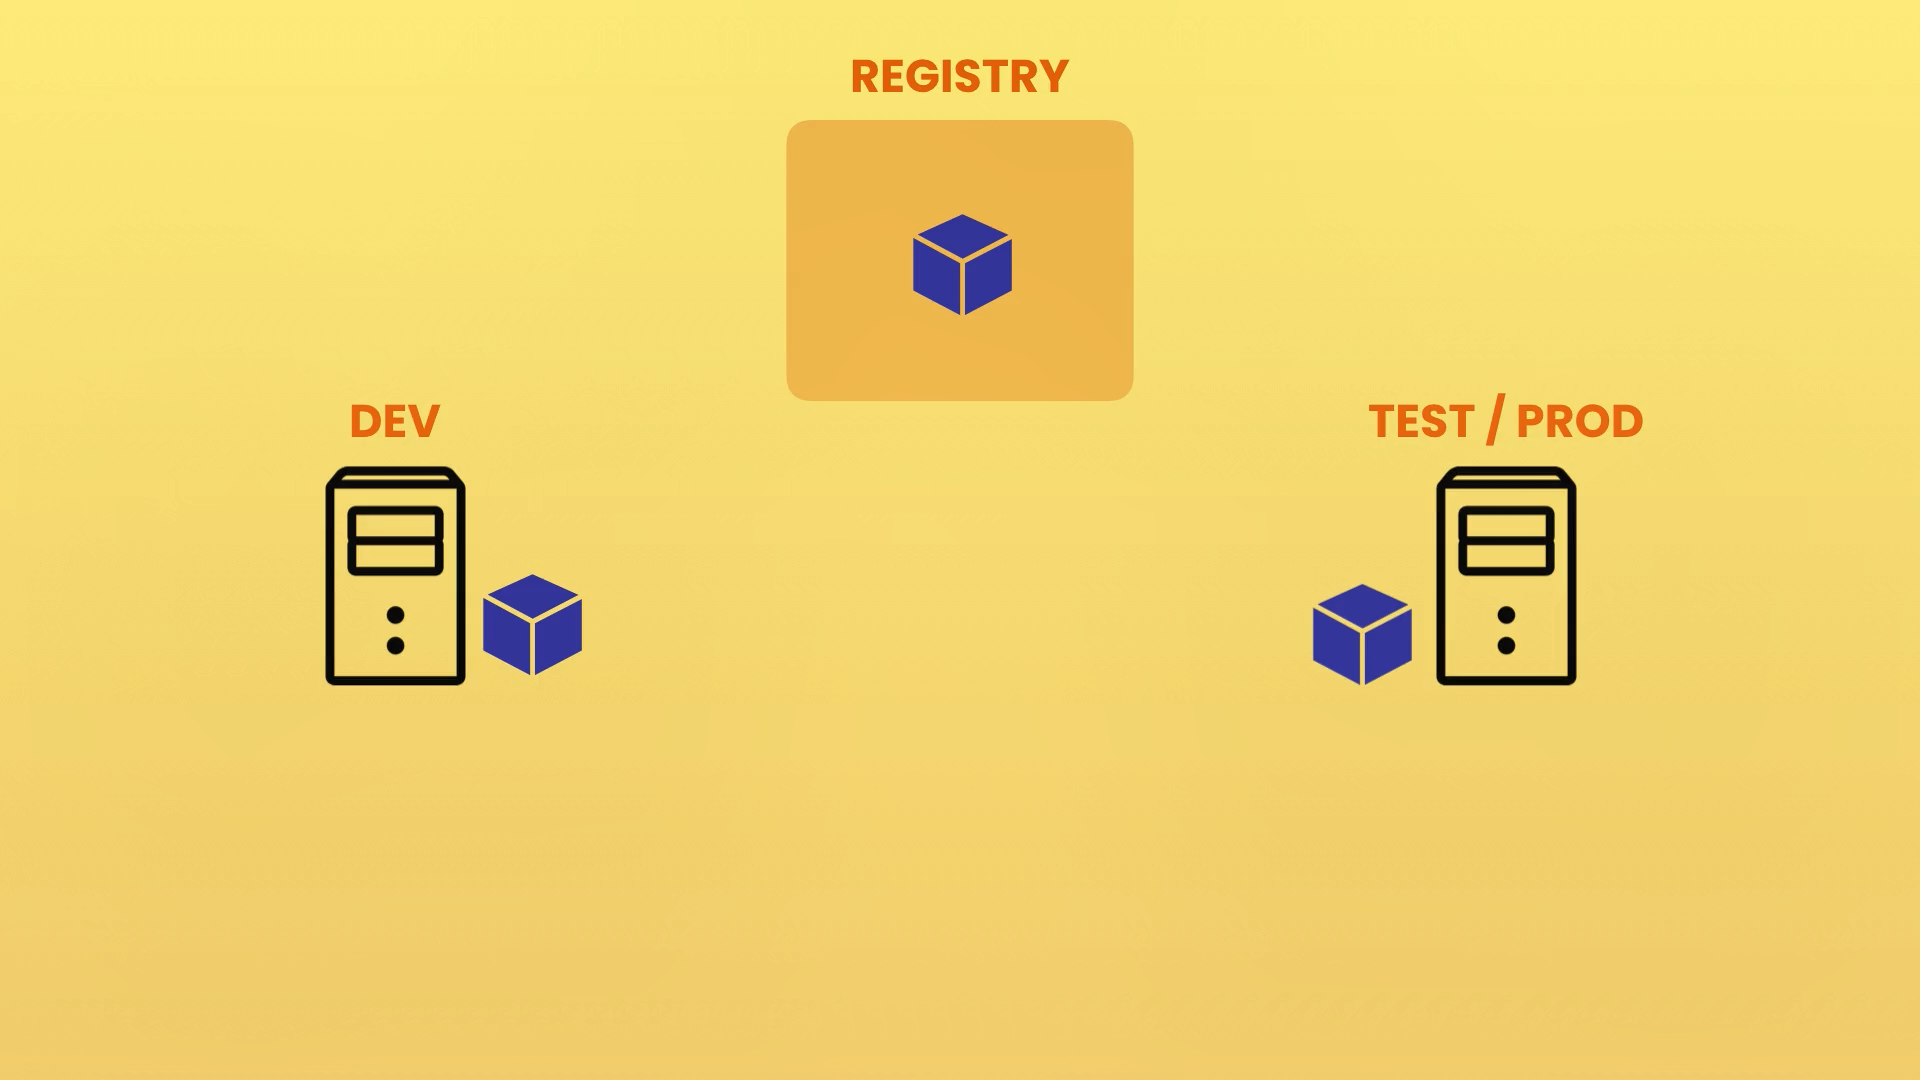

**Definition**: Docker Hub is a cloud-based repository service for storing, managing, and sharing Docker images. It serves as a central platform for developers to distribute and access containerized applications.

**Key Features**:

- **Image Repository**: Hosts both public and private repositories, allowing users to store and share Docker images.

- **Automated Builds**: Supports automated builds, allowing users to automatically build Docker images from source code.

- **Webhooks**: Notifies external services of events, such as when a new image is pushed to a repository.

- **Official Images**: Provides a library of curated images for popular applications and operating systems, maintained by Docker and the community.

## Docker Workflow: Development to Production

### Development (Dev):
Developers build and test Docker images on their local machines or development servers.
Using a Dockerfile, the application, dependencies, and environment are packaged into an image.
After testing the container locally, the image is deemed ready for sharing or deployment.

### Registry:

Once an image is finalized, it is pushed to a registry, such as Docker Hub, Amazon ECR, or a private repository. The registry acts as a centralized storage for Docker images.
The registry enables collaboration and easy sharing of images between development and production environments.

### Test/Production (Prod):

From the registry, the image is pulled into different environments:
- Test Environment: The image is deployed to a test server, where QA teams validate the application.
- Production Environment: Once the image passes testing, it is deployed to production servers where it runs live.

---

# Docker in Action

## 1. Setting Up the Directory and Files

### Step 1: Create a Directory
Use the `mkdir` command to create a new directory on the Desktop:

```bash
mkdir hello-docker
```

### Step 2: Navigate to the Directory
Change to the newly created directory using the `cd` command:
```bash
cd hello-docker
```

### Step 3: Open in Visual Studio Code
Open the directory in Visual Studio Code using:
```bash
code .
```

## 2. Creating the Application File

### Step 4: Create `app.js`
Inside the `hello-docker` directory, create a file named `app.js`. This file will be considered as our program. Add the following content:

```javascript
// app.js
console.log("Hello Docker!");
```
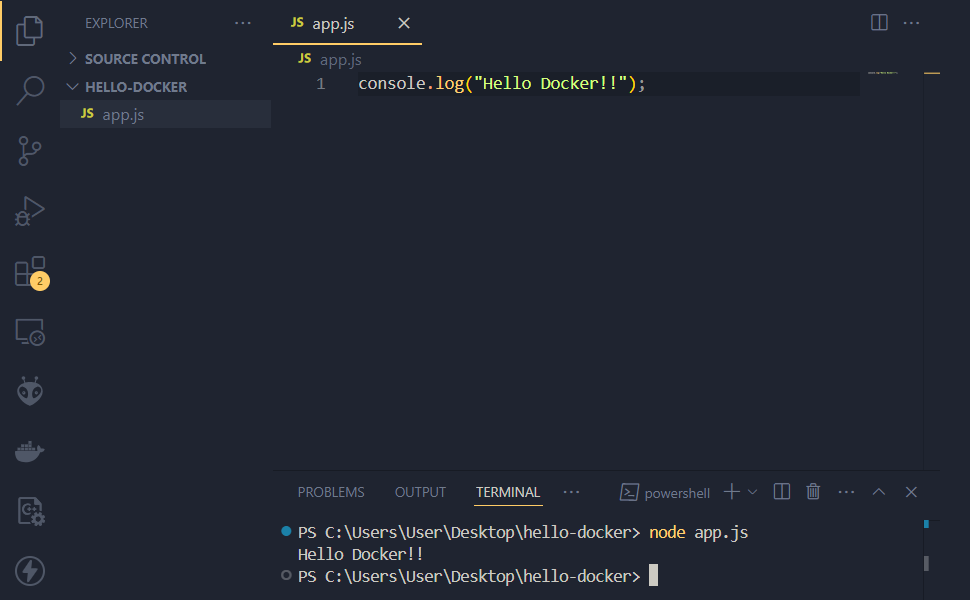

This program simply prints "Hello Docker!" to the console.

## 3. Creating the Dockerfile

### Step 5: Create a `Dockerfile`
Create a file named `Dockerfile` (no extension). Add the following content:

```dockerfile
# Dockerfile

# Use a lightweight Node.js image as the base image
FROM node:alpine

# Set the working directory inside the container
COPY . /app
WORKDIR /app

# Specify the command to run the application
CMD node app.js
```

#### **What is Alpine Linux?**

- Alpine Linux is a minimal and security-focused Linux distribution designed for containers.
- It is small in size (typically around 5 MB), making it ideal for creating lightweight Docker images.

#### **Why Use node:alpine?**
- Small Size: The node:alpine image is much smaller compared to the default Node.js images like node:latest, which are based on larger Linux distributions such as Debian or Ubuntu.
- Faster Builds: A smaller base image reduces the overall size of the Docker image, leading to faster downloads and deployments.
- Security: Alpine Linux is known for its minimal attack surface, making it a secure choice for containerized applications.
 
#### **Trade-offs of Using Alpine**
- Limited Tools: Since Alpine is minimal, some tools and libraries commonly found in larger distributions may be missing. If your application relies on such libraries, you may need to install them manually (e.g., using apk add).
- Potential Compatibility Issues: Some Node.js packages that require native dependencies may not compile easily on Alpine without additional setup.

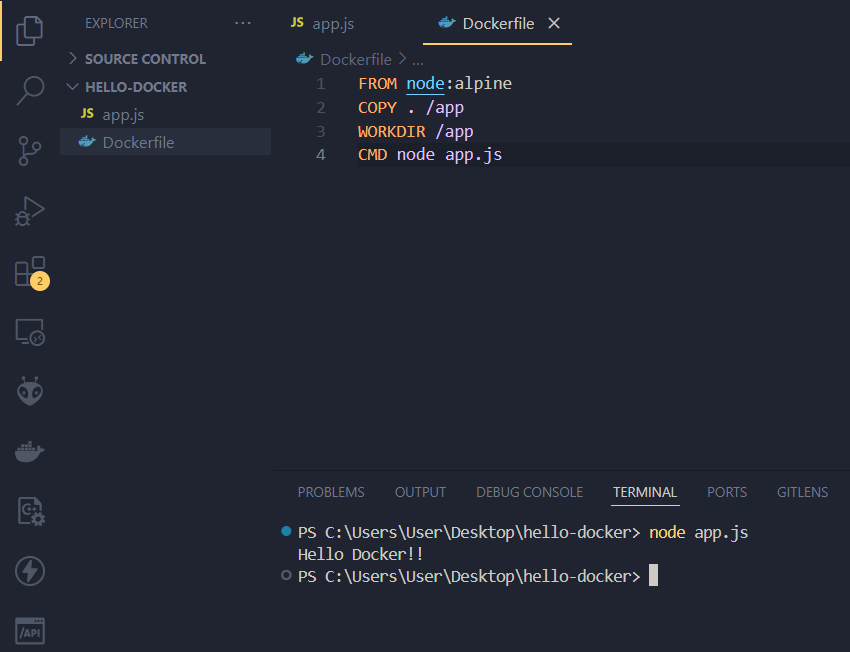

### Explanation of the Dockerfile
- `FROM node:alpine`: Specifies the base image, a lightweight version of Node.js, to build the container.
- `COPY . /app`: Copies the contents of the current directory on the host to `/app` in the container.
- `WORKDIR /app`: Sets the working directory inside the container to `/app`.
- `CMD node app.js`: Specifies the command to run the application (`node app.js`).

## 4. Building and Pushing the Docker Image

### Step 6: Build the Docker Image
Run the following command to build the Docker image:

```bash
docker build -t hello-docker .
```
- `-t hello-docker`: Tags the image with the name `hello-docker`.
- `.`: Specifies the current directory as the build context.

### Step 7: Verify the Image Creation

Run the following command to verify that the image has been created:

```
docker image ls
```

Example output:  

```
PS C:\Users\User\Desktop\hello-docker> docker image ls
REPOSITORY     TAG       IMAGE ID       CREATED          SIZE
hello-docker   latest    ad4719cb05b2   42 seconds ago   228MB
```

### Step 8: Login to Docker Hub
Log in to your Docker Hub account using:

```bash
docker login
```
Enter your Docker Hub username and password when prompted.

### Step 9: Tag the Image
Tag the image with your Docker Hub username and repository name:

```bash
docker tag hello-docker:latest <your_dockerhub_username>/hello-docker:latest
```
Replace `<your_dockerhub_username>` with your actual Docker Hub username.

#### **Tagging an image in Docker means :**
assigning it a name and version (or tag) to make it identifiable and easier to manage. When you build an image, Docker assigns it a default "latest" tag if you don't specify one. However, when you want to share the image (e.g., on Docker Hub), you need to provide a unique identifier that includes your Docker Hub username and the repository name.

For example:
```
docker tag hello-docker:latest <your_dockerhub_username>/hello-docker:latest
```
`hello-docker:latest ` :-The name of the image you built locally and its version tag (latest by default).
`<your_dockerhub_username>/hello-docker:latest ` :-The name of the image with your Docker Hub username as a prefix. This creates a "fully qualified" name for Docker Hub.

#### This tag ensures that:

- Docker knows which repository on Docker Hub the image belongs to.
- Users downloading the image can uniquely identify it.
 
Tagging is like labeling a file before sharing it. Without a proper tag, the image cannot be associated with your Docker Hub account and repository.

### Step 10: Push the Image
Push the image to Docker Hub using:

```bash
docker push <your_dockerhub_username>/hello-docker:latest
```
# Using 'Play with Docker' to Pull and Run a Container from Docker Hub

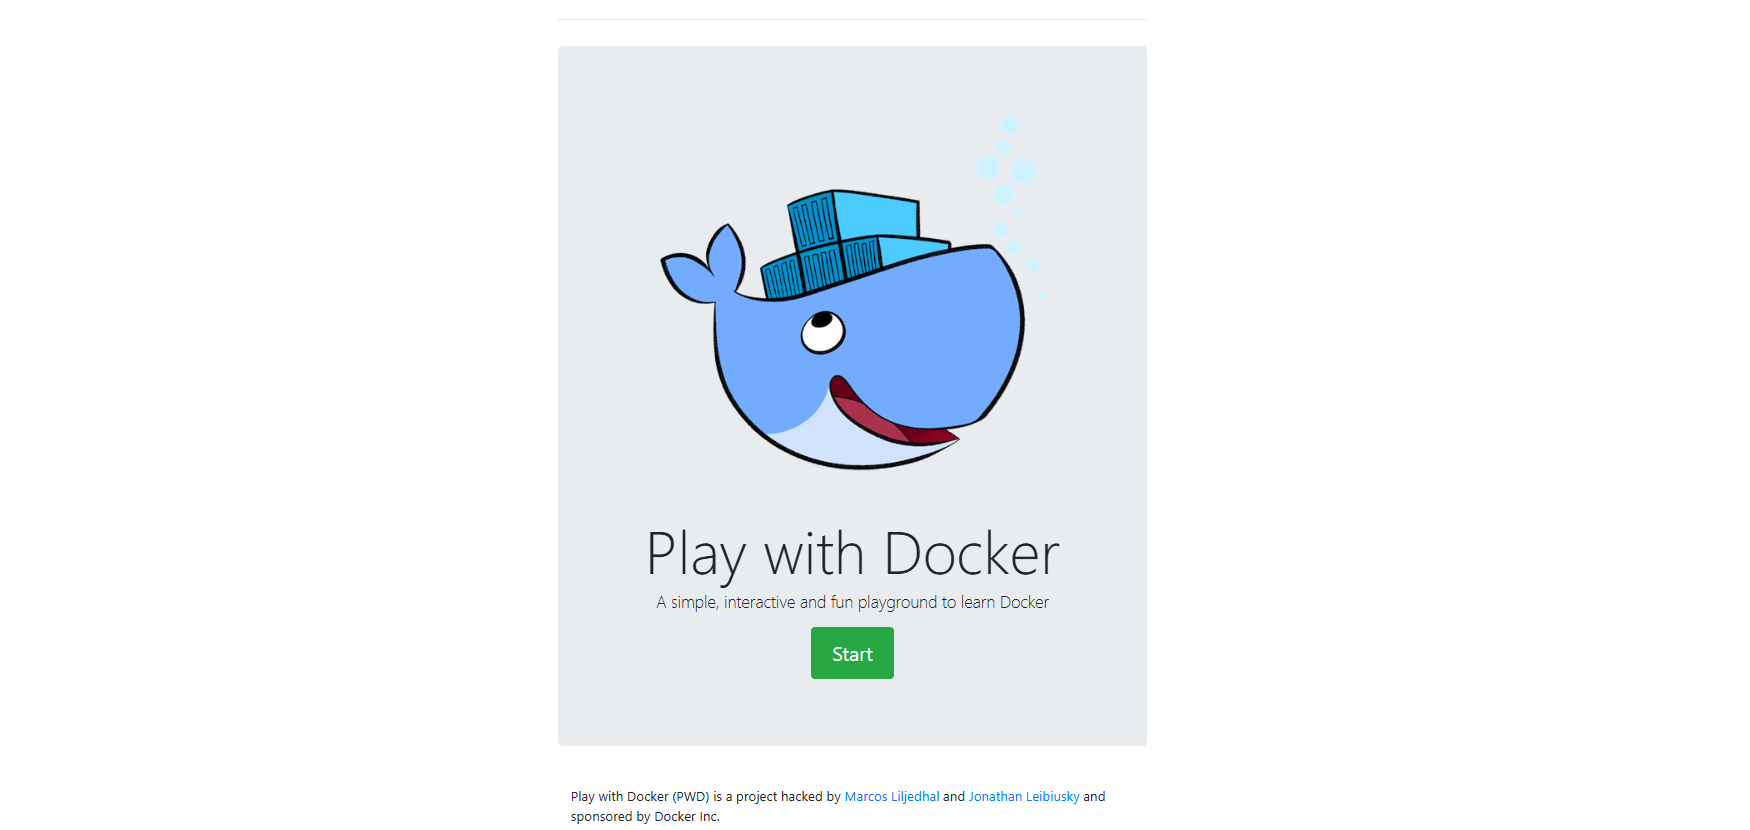

## Prerequisites
- A previously pushed container available on Docker Hub.
- Docker Hub account credentials.
- Access to **Play with Docker (PWD)**: [https://labs.play-with-docker.com](https://labs.play-with-docker.com).

## Steps to Pull and Run a Container in Play with Docker

### Step 1: Open Play with Docker
1. Visit [Play with Docker](https://labs.play-with-docker.com).
2. Log in with your Docker Hub account.
3. Once logged in, click **Start** to begin a session.

### Step 2: Create a New Instance
1. In the Play with Docker interface, click **+ ADD NEW INSTANCE**.
2. A virtual instance (VM) will be created, and you’ll see a terminal window for interacting with the instance.

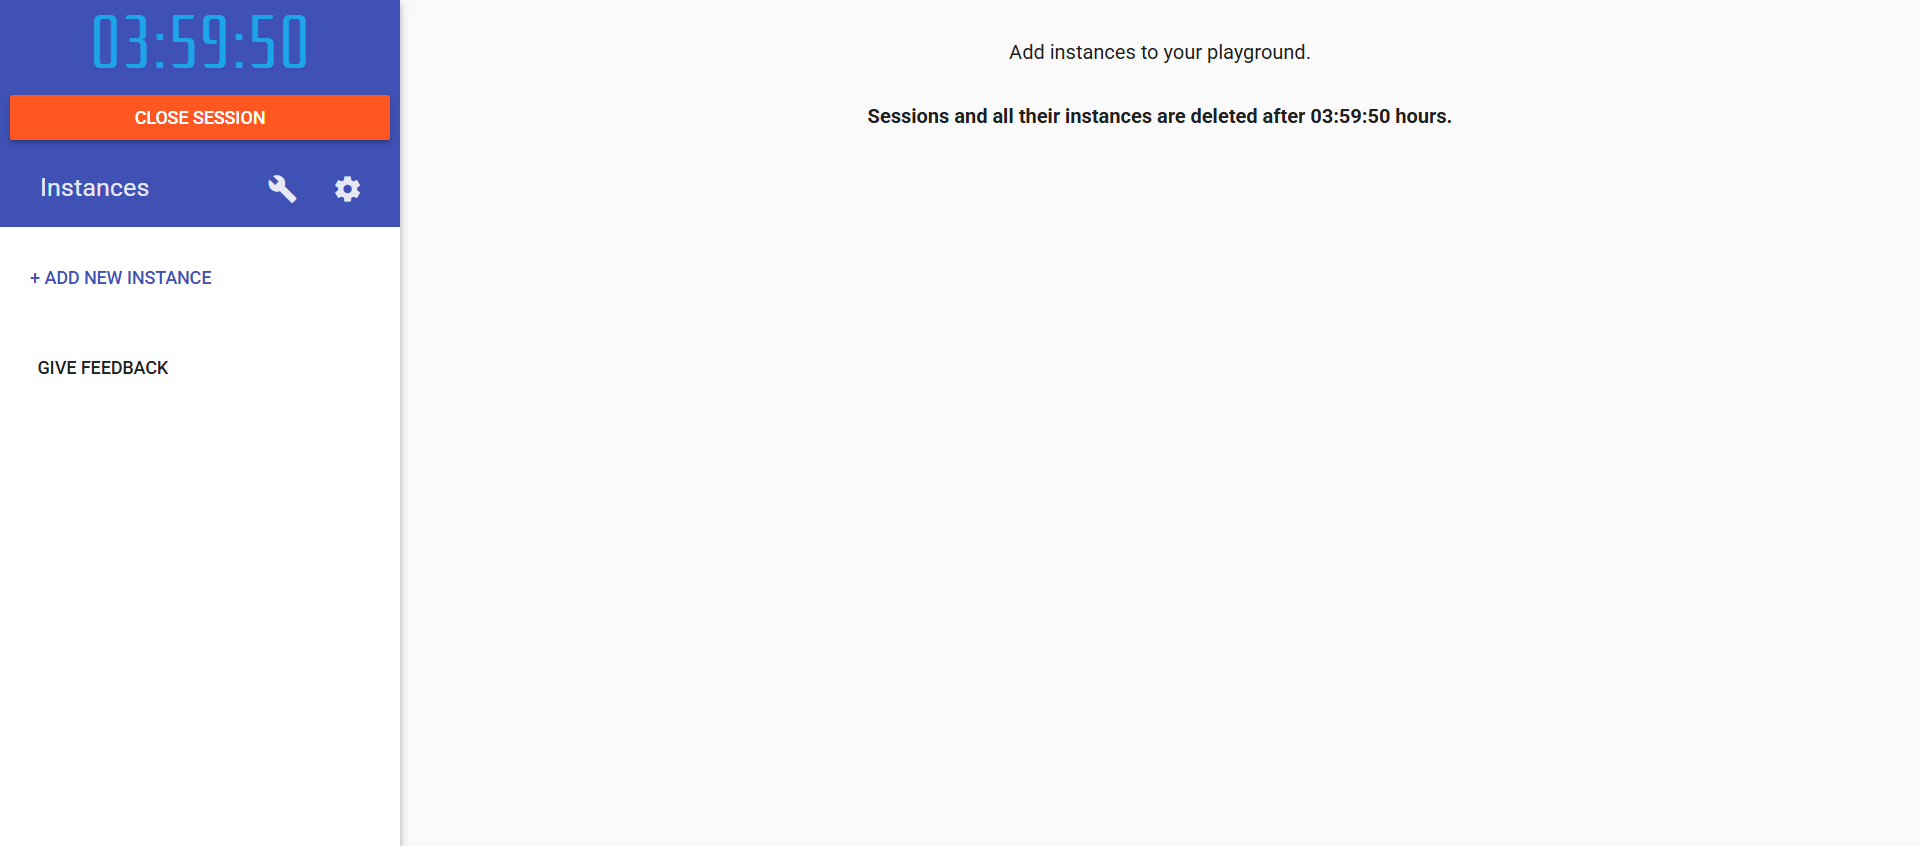

### Step 3: Pull the Docker Image
1. In the terminal, run the following command to pull your previously pushed Docker image from Docker Hub:
   ```bash
   docker pull <your_dockerhub_username>/<repository_name>:latest
   ```
Replace `<your_dockerhub_username>` and `<repository_name>` with your `Docker Hub username` and `repository name`. Example:

```
docker pull sithubmimsara2003/hello-docker:latest
```

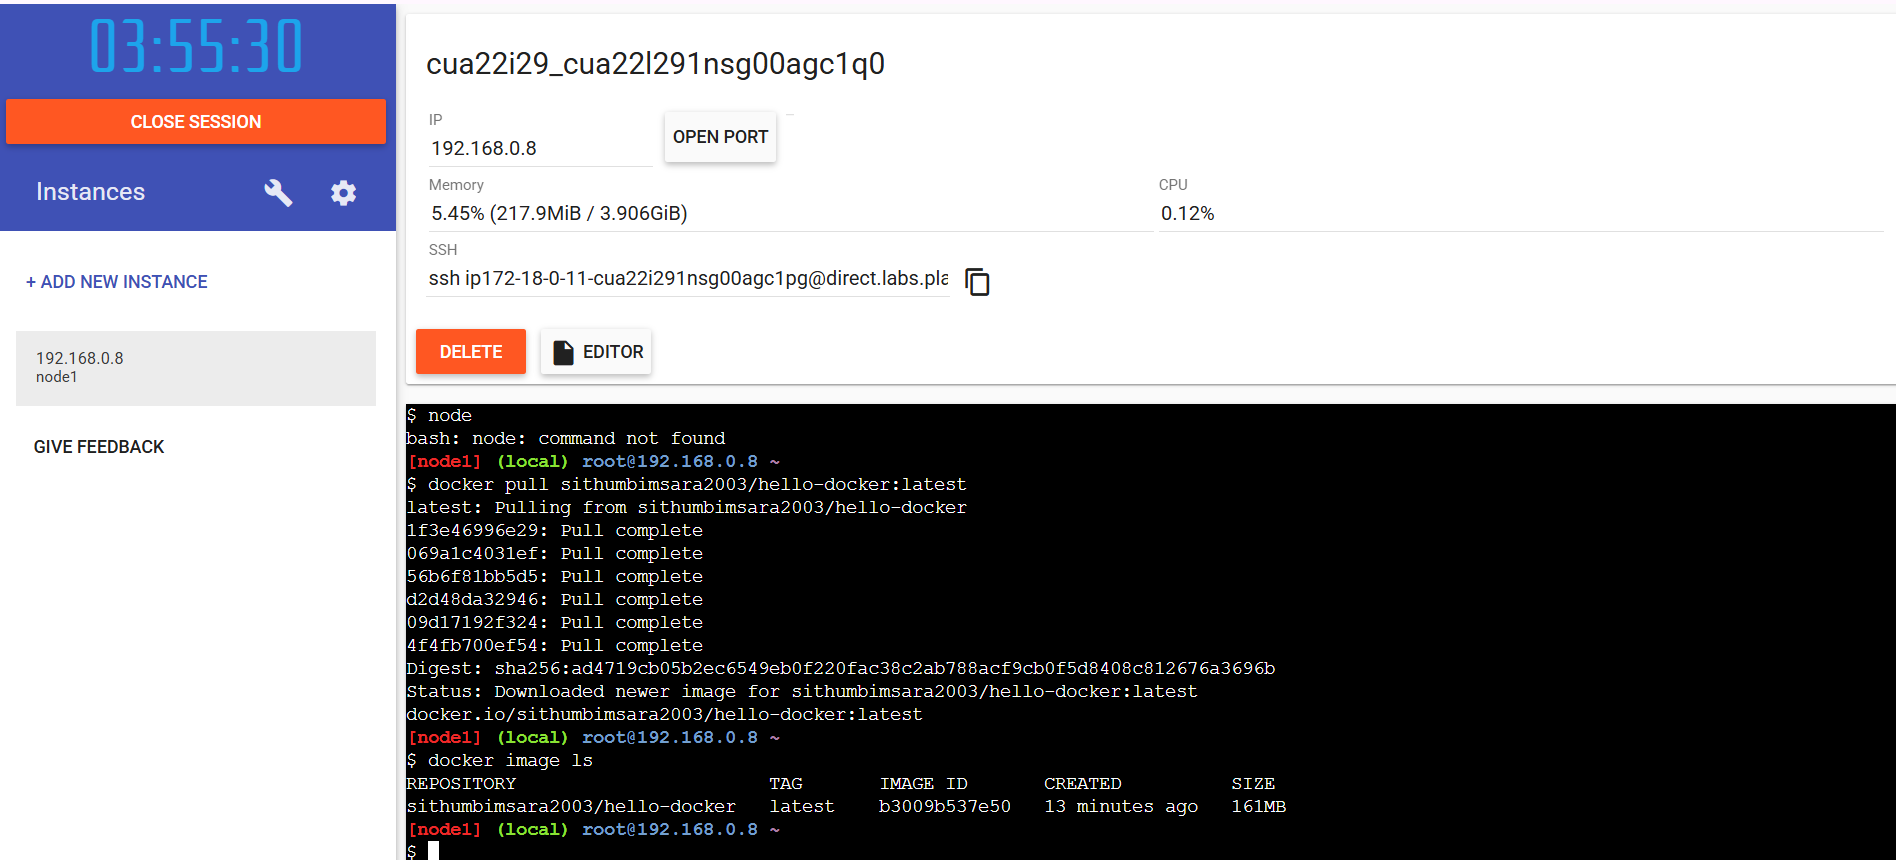


The terminal will show the progress of the pull process. For example:
```
Pull complete
Digest: sha256:<digest_hash>
Status: Downloaded newer image for <repository>:latest
```
### Step 4: Verify the Pulled Image
To confirm the image is downloaded, run:

```
docker image ls
```
The output will display the list of Docker images available in the instance. Example:

```
REPOSITORY                  TAG       IMAGE ID       CREATED          SIZE
sithubmimsara2003/hello-docker   latest    b30095b375c0   13 minutes ago   228MB
```

### Step 5: Run the Container
Use the following command to run the container:

```
docker run <repository>:<tag>
```
Example:

```
docker run sithubmimsara2003/hello-docker:latest
```
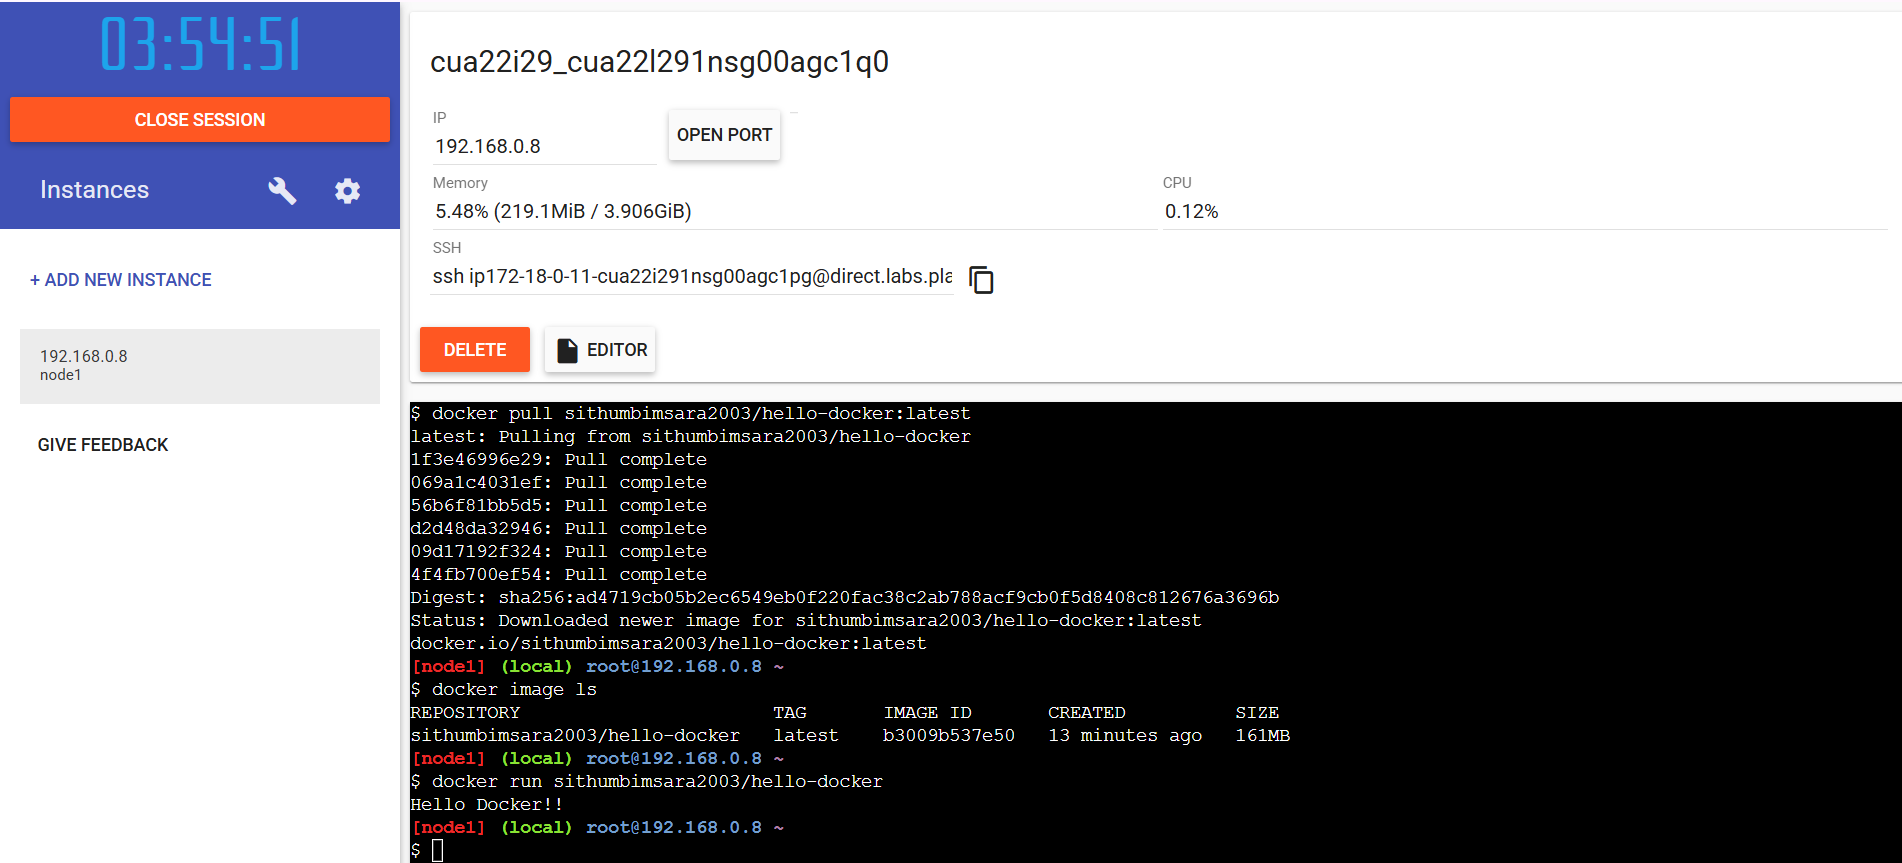

The container will execute the command specified in the Dockerfile (e.g., running node app.js).

If your image contains a Node.js script, it will display the output:

```
Hello Docker!
```
   
 ---